In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline

import logging
logging.getLogger('matplotlib.font_manager').disabled = True

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

In [4]:
# number of tickets per month
X = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Y = [160, 180, 250, 140, 175, 150, 125, 156, 126, 104, 124, 140] # processed
Z = [160, 180, 255, 140, 175, 160, 135, 202, 160, 139, 149, 177] # received

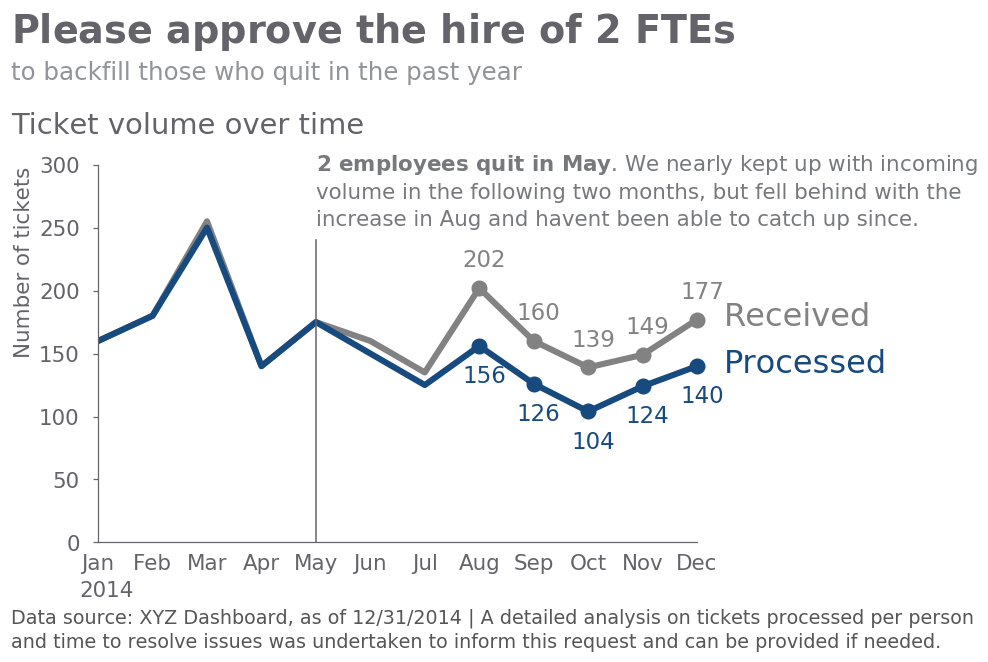

In [5]:
# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 6.09), # width, height in inches
                        dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.104, right=0.768, top=0.751, bottom=0.187)

# draw received tickets line with markers
ax1.plot(range(12), Z, linewidth=4, color=GRAY6)
ax1.scatter(range(12)[-5:], Z[-5:], s=90, color=GRAY6, clip_on=False)

# draw processed tickets line with markers
ax1.plot(range(12), Y, linewidth=4, color=BLUE1)
ax1.scatter(range(12)[-5:], Y[-5:], s=90, color=BLUE1, clip_on=False)

# annotate received
for i, v in enumerate(Z[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                    # (x,y) point to annotate
                 xytext=(-11, 14),            # (x,y) to place the text at
                 textcoords='offset points',  # offset (in points)
                 color=GRAY6,
                 fontsize=15)

# annotate proccessed
for i, v in enumerate(Y[-5:]):
    ax1.annotate(str(v),
                 (i+7, v),                   # (x,y) point to annotate
                 xytext=(-11, -24),          # (x,y) to place the text at
                 textcoords='offset points', # offset (in points)
                 color=BLUE1,
                 fontsize=15)


# set the data limits for the y-axis and x-axis
ax1.set_xlim([0, 11])
ax1.set_ylim([0, 300])

# set properties for axes object
plt.setp(ax1,
         xticks=list(range(12)),
         xticklabels=X,
         yticks=list(range(0, 350, 50)))

# configure x, y tick labels appearance
for i in ax1.get_yticklabels() + ax1.get_xticklabels():
    i.set_fontsize(14)
    i.set_color(GRAY4)

# shift y tick labels slightly left
for item in ax1.get_yticklabels():
    offset = transforms.ScaledTranslation(-0.07, 0, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

# change the appearance of ticks, tick labels, and gridlines
ax1.tick_params(bottom=False)

# change ticks and spines colors
ax1.tick_params(color=GRAY4)
ax1.spines['bottom'].set_color(GRAY4)
ax1.spines['left'].set_color(GRAY4)

# remove chart border
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# add vertical reference line
plt.axvline(x=4, ymax=0.8, color='#636369', linewidth=1)

# label lines directly
ax1.text(11.5, 172, 'Received', fontsize='21', color=GRAY6)
ax1.text(11.5, 135, 'Processed', fontsize='21', color=BLUE1)


# title the axis
ax1.text(-1.6, 325, 'Ticket volume over time', fontsize=19, color=GRAY4)
ax1.text(-1.55, 150, 'Number of tickets', fontsize=14, rotation='vertical',
         color=GRAY4)
ax1.text(-0.34, -43, '2014', fontsize=14, color=GRAY4)

# title the plot
ax1.text(-1.6, 397, '$\\bf{Please\ approve\ the\ hire\ of\ 2\ FTEs}$',
         fontsize=25, color=GRAY4)
ax1.text(-1.6, 368, 'to backfill those who quit in the past year',
         fontsize=16, color=GRAY7)

# add more informative text
ax1.text(4, 252,
         '$\\bf{2\ employees\ quit\ in\ May}$. We nearly kept up with'
         ' incoming\n'
         'volume in the following two months, but fell behind with the\n'
         'increase in Aug and haven''t been able to catch up since.',
         fontsize=14, color=GRAY5, linespacing=1.4)

# add footnote to the plot with data sources
ax1.text(-1.6, -83,
         'Data source: XYZ Dashboard, as of 12/31/2014 | A detailed analysis'
         ' on tickets processed per person\n'
         'and time to resolve issues was undertaken to inform this request'
         ' and can be provided if needed.',
         fontsize=12.5, color=GRAY3, linespacing=1.3);